In [53]:
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from utils import create_param_list, inference, calc_correlation_configuration

In [54]:
# nconf = 31
# ndata = 990
# L = 64
# T_cr = 2.269 # critical temp for 2d ising
# t_start = 2.1
# model_name = "2d_Ising"

# Q = 3
# nconf = 31
# ndata = 990
# L = 64
# T_cr = 0.995  # critical temp for 2d 3 state Potts
# t_start = 0.85
# model_name = "2d_Potts"

# Q = 5
# nconf = 31
# ndata = 990
# L = 64
# T_cr = 0.852 # critical temp for 2d 5 state Potts
# t_start = 0.7
# model_name = "2d_Potts"

# Q = 4
# nconf = 51
# ndata = 1000
# L = 64
# T_cr = 1.135 # critical temp for 2d 4 state Clock
# t_start = 0.9
# model_name = "2d_Clock"

Q = 6
nconf = 81
ndata = 1000
L = 64
T_cr_1 = 0.701 # critical temp for 2d 6 state clock
T_cr_2 = 0.898 # critical temp for 2d 6 state clock
t_start = 0.4
model_name = "2d_Clock"

# prm_list, t_end = create_param_list(nconf=nconf, t_start=t_start, L=L, model_name="2d_Ising")
# prm_list, t_end = create_param_list(nconf=nconf, t_start=t_start, L=L, model_name="2d_Potts", q=Q)
prm_list, t_end = create_param_list(nconf=nconf, t_start=t_start, L=L, model_name="2d_Clock", q=Q)
# print(prm_list)
print(f"データ数:{nconf*ndata}")

データ数:81000


In [55]:
img_list, correlation_configuration_list, temp_list = [], [], []
for num in range(nconf):
    for iconf in range(ndata):
        file = f"{prm_list[num][1]}{iconf}.npy"
        img_list.append(np.load(file))
        correlation_configuration_list.append(calc_correlation_configuration(np.load(file), L=L, model_name=model_name, Q=Q))
        temp_list.append(prm_list[num][0])

img_dataset = np.array(img_list)
correlation_configuration_dataset = np.array(correlation_configuration_list)

In [61]:
# flatten+kmeans
n_clusters = 3
target_size = 3

correlation_configuration_flatten = correlation_configuration_dataset.reshape(correlation_configuration_dataset.shape[0], -1)
# sc = StandardScaler()
# correlation_configuration_std = sc.fit_transform(correlation_configuration_flatten)
model = KMeans(n_clusters=n_clusters, n_init='auto', max_iter=500).fit(correlation_configuration_flatten)

prediction = list(model.labels_)  # クラスタのラベル
# print(prediction)
centers = model.cluster_centers_  # クラスタの重心
# print(centers)

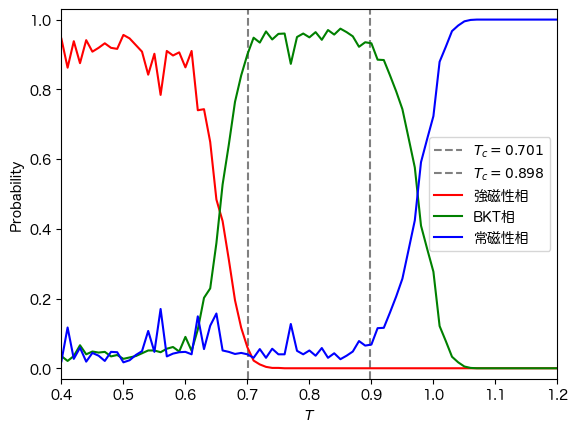

In [63]:
xs, y1s, y2s, y3s = inference(nconf*ndata, temp_list, prediction, target_size)
# plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.axvline(x=T_cr_1, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr_1))
plt.axvline(x=T_cr_2, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr_2))

plt.xlim(t_start, t_end)
plt.ylim(-0.03, 1.03)
plt.plot(xs, y1s, label=r"強磁性相", color="red")
plt.plot(xs, y2s, label=r"BKT相", color="green")
plt.plot(xs, y3s, label=r"常磁性相", color="blue")
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"Probability")
plt.show()

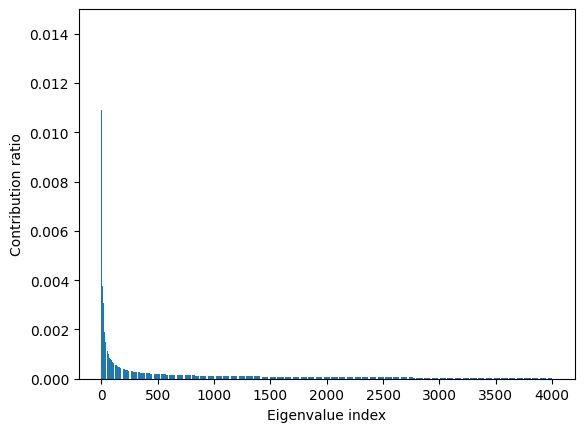

explained variance ratio 10.0% over
1
explained variance ratio 20.0% over
2
explained variance ratio 30.000000000000004% over
3
explained variance ratio 40.0% over
4
explained variance ratio 50.0% over
14
explained variance ratio 60.0% over
78
explained variance ratio 70.0% over
298
explained variance ratio 80.0% over
848
explained variance ratio 89.99999999999999% over
1906


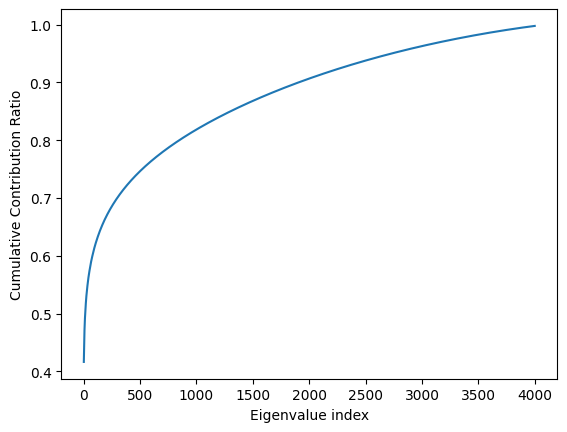

In [7]:
# 累積寄与率を決定する
n_components = 4000

img_dataset_flatten = img_dataset.reshape(img_dataset.shape[0], -1)
sc = StandardScaler()
img_dataset_std = sc.fit_transform(img_dataset_flatten)

pca = PCA(n_components=n_components)
pca.fit(img_dataset_std)
plt.ylim(0,0.015)
plt.xlabel("Eigenvalue index")
plt.ylabel("Contribution ratio")
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
plt.show()

total_ratio = 0
count = 0
prob = 0.10
ratio_list = []
n_components_redution_list = []
for ratio in pca.explained_variance_ratio_:
    total_ratio += ratio
    count += 1
    ratio_list.append(total_ratio)
    if total_ratio > prob:
        print(f"explained variance ratio {prob*100}% over")
        print(count)
        n_components_redution_list.append(count)
        prob += 0.10
plt.xlabel("Eigenvalue index")
plt.ylabel("Cumulative Contribution Ratio")
plt.plot([n for n in range(1, len(pca.explained_variance_ratio_)+1)], ratio_list)
plt.show()

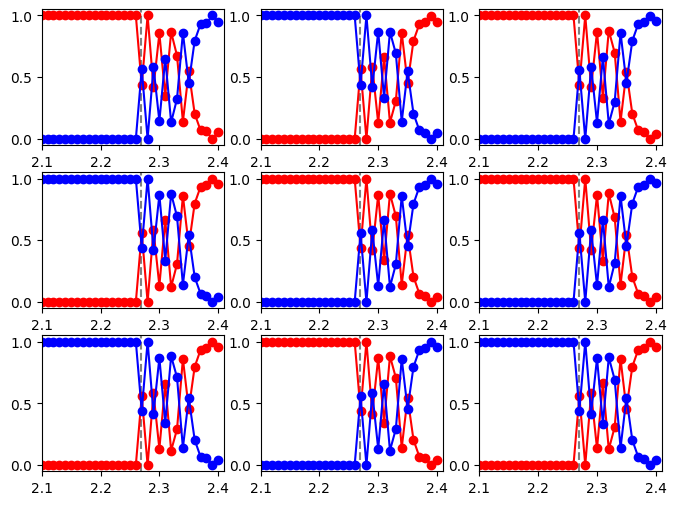

In [57]:
# flatten+PCA+kmeans
n_clusters = 2
n_components_redution_list = [9, 37, 91, 185, 336, 563, 895, 1384, 2167]

img_dataset_flatten = img_dataset.reshape(img_dataset.shape[0], -1)
sc = StandardScaler()
img_dataset_std = sc.fit_transform(img_dataset_flatten)

xs_list, y1s_list, y2s_list = [], [], []
for n_components_redution in n_components_redution_list:
    pca = PCA(n_components=n_components_redution)
    pca.fit(img_dataset_std)
    img_dataset_pca = pca.transform(img_dataset_std)
    model = KMeans(
        n_clusters=n_clusters,
        n_init=50,
        max_iter=500,
        tol=0.01,
        algorithm="elkan"
    ).fit(img_dataset_pca)

    prediction = list(model.labels_)  # クラスタのラベル
    # print(prediction)
    centers = model.cluster_centers_  # クラスタの重心
    # print(centers)
    xs, y1s, y2s = inference(prediction)
    xs_list.append(xs)
    y1s_list.append(y1s)
    y2s_list.append(y2s)
    

# 可視化
row = 3  # 行数
col = 3  # 列数

fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(8, 6))
for i in range(row*col):
    _r = i // col
    _c = i % col
    ax[_r,_c].axvline(x=T_cr, ymin=0, ymax=1, ls="dashed",
            color="gray", label=r"$T_c={}$".format(T_cr))
    ax[_r,_c].set_xlim(t_start, t_end)
    ax[_r,_c].plot(xs_list[i], y2s_list[i], label=r"$ferro$", marker="o", color="red")
    ax[_r,_c].plot(xs_list[i], y1s_list[i], label=r"$para$", marker="o", color="blue")
    # ax[_r,_c].legend()
    # ax[_r,_c].set_xlabel(r"$T$")
    # ax[_r,_c].set_ylabel(r"Probability")

In [55]:
# CNN+kmeans